In [2]:
import pandas as pd
import numpy as np
import string
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as pp
%matplotlib inline
from os import listdir
from os.path import isfile, join
from functools import reduce
import statsmodels.api as sm
import tensorflow as tf
print(tf.__version__)

2.2.0


In [3]:
####---------------------------DATA MANIPULATION ---------------------------------####
#load the currencies files
path='data/'
CurrenciesFilesPath = ['data/'+f for f in listdir(path) if isfile(join(path, f))]
for file in CurrenciesFilesPath:
    print(file)

data/BCH-USD.csv
data/BTC-USD.csv
data/ETH-USD.csv
data/IOT-USD.csv
data/LTC-USD.csv
data/XMR-USD.csv
data/XRP-USD.csv


In [4]:
#now the idea is to put all these data together in a single variable, matching them with the date variable

#make a list of the data? -> a list of dataframes?
#data=[pd.read_csv(f) for f in CurrenciesFilesPath]
data=[pd.read_csv(f, index_col='Date', parse_dates=['Date'], converters={'Close':np.float32}) for f in CurrenciesFilesPath]

#Remove the useless columns
####data=[currency.drop(['Date','Open','High','Low','Adj Close','Volume'],1) for currency in data]
data=[currency.drop(['Open','High','Low','Adj Close','Volume'],1) for currency in data]

In [5]:
#Remove duplicates
#data=[table.drop_duplicates(subset='Date') for table in data]

In [6]:
for table in data:
    print(table.head())


                  Close
Date                   
2018-01-09  2376.679932
2018-01-10  2856.929932
2018-01-11  2437.919922
2018-01-12  2596.199951
2018-01-13  2664.899902
                   Close
Date                    
2018-01-11  13308.059570
2018-01-12  13841.190430
2018-01-13  14243.120117
2018-01-14  13638.629883
2018-01-15  13631.980469
                  Close
Date                   
2018-01-09  1289.239990
2018-01-10  1248.989990
2018-01-11  1139.319946
2018-01-12  1261.030029
2018-01-13  1385.020020
            Close
Date             
2018-01-09   3.53
2018-01-10   3.75
2018-01-11   3.35
2018-01-12   3.64
2018-01-13   3.90
                 Close
Date                  
2018-01-09  246.039993
2018-01-10  249.100006
2018-01-11  226.529999
2018-01-12  235.350006
2018-01-13  257.940002
                 Close
Date                  
2018-01-09  410.690002
2018-01-10  403.519989
2018-01-11  352.950012
2018-01-12  389.399994
2018-01-13  416.290009
            Close
Date             
2018-

In [7]:
#Rename the colone Close to the name of the currency
temp=[f.split('/')[1].split('.')[0] for f in CurrenciesFilesPath]
for i, Table in enumerate(data):
    #Table.columns=['Date',temp[i]]
    Table.columns=[temp[i]]
    data[i]=data[i].loc[~data[i].index.duplicated(keep='first')]
for i, Table in enumerate(data): #loop has to be here twice to remove all duplicates. why??
    data[i]=data[i].loc[~data[i].index.duplicated(keep='first')]
    
for table in data:
    print(table.head())

                BCH-USD
Date                   
2018-01-09  2376.679932
2018-01-10  2856.929932
2018-01-11  2437.919922
2018-01-12  2596.199951
2018-01-13  2664.899902
                 BTC-USD
Date                    
2018-01-11  13308.059570
2018-01-12  13841.190430
2018-01-13  14243.120117
2018-01-14  13638.629883
2018-01-15  13631.980469
                ETH-USD
Date                   
2018-01-09  1289.239990
2018-01-10  1248.989990
2018-01-11  1139.319946
2018-01-12  1261.030029
2018-01-13  1385.020020
            IOT-USD
Date               
2018-01-09     3.53
2018-01-10     3.75
2018-01-11     3.35
2018-01-12     3.64
2018-01-13     3.90
               LTC-USD
Date                  
2018-01-09  246.039993
2018-01-10  249.100006
2018-01-11  226.529999
2018-01-12  235.350006
2018-01-13  257.940002
               XMR-USD
Date                  
2018-01-09  410.690002
2018-01-10  403.519989
2018-01-11  352.950012
2018-01-12  389.399994
2018-01-13  416.290009
            XRP-USD
Date   

In [8]:
#Join tables (index are dates for all of them)
df_final=data[0].join(data[1:])
print('Lenght of table : '+ str(len(df_final)))
df_final=df_final.dropna()
df_final

Lenght of table : 486


,BCH-USD,BTC-USD,ETH-USD,IOT-USD,LTC-USD,XMR-USD,XRP-USD
Date,,,,,,,
2018-01-11,2437.919922,13308.059570,1139.319946,3.3500,226.529999,352.950012,1.9300
2018-01-12,2596.199951,13841.190430,1261.030029,3.6400,235.350006,389.399994,2.0200
2018-01-13,2664.899902,14243.120117,1385.020020,3.9000,257.940002,416.290009,2.0000
2018-01-14,2530.209961,13638.629883,1359.479980,3.7200,236.860001,394.459991,1.8300
2018-01-15,2394.050049,13631.980469,1278.689941,3.4700,231.889999,412.820007,1.6600
...,...,...,...,...,...,...,...
2018-12-30,163.220001,3896.209961,141.330002,0.3669,32.020000,49.160000,0.3752
2018-12-31,149.229996,3747.389893,133.490005,0.3606,30.129999,46.560001,0.3564
2019-01-01,165.020004,3880.149902,142.660004,0.3753,32.119999,49.169998,0.3709


In [9]:
print(df_final)

                BCH-USD       BTC-USD      ETH-USD  IOT-USD     LTC-USD  \
Date                                                                      
2018-01-11  2437.919922  13308.059570  1139.319946   3.3500  226.529999   
2018-01-12  2596.199951  13841.190430  1261.030029   3.6400  235.350006   
2018-01-13  2664.899902  14243.120117  1385.020020   3.9000  257.940002   
2018-01-14  2530.209961  13638.629883  1359.479980   3.7200  236.860001   
2018-01-15  2394.050049  13631.980469  1278.689941   3.4700  231.889999   
...                 ...           ...          ...      ...         ...   
2018-12-30   163.220001   3896.209961   141.330002   0.3669   32.020000   
2018-12-31   149.229996   3747.389893   133.490005   0.3606   30.129999   
2019-01-01   165.020004   3880.149902   142.660004   0.3753   32.119999   
2019-01-02   171.699997   3961.010010   156.570007   0.4013   33.400002   
2019-01-03   160.990005   3835.860107   149.440002   0.3866   32.029999   

               XMR-USD  

<function matplotlib.pyplot.show(*args, **kw)>

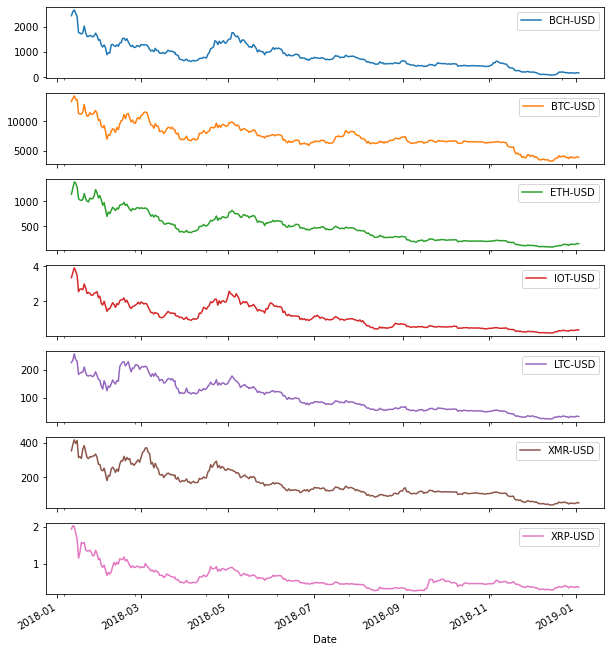

In [8]:
#Visualize the data
df_final.plot(subplots=True, figsize=(10,12))
#pp.title('Currency values')
pp.savefig('currency.png')
pp.show

<function matplotlib.pyplot.show(*args, **kw)>

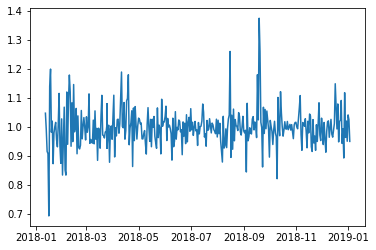

<Figure size 1080x576 with 0 Axes>

In [9]:
#variation over time of XRP
df_final['ChangeXRP']=df_final['XRP-USD'].div(df_final['XRP-USD'].shift())

pp.plot(df_final['ChangeXRP'])
pp.figure(figsize=(15,8))
pp.title='XRP change over time'
pp.savefig('XRPVariation.png')
pp.show

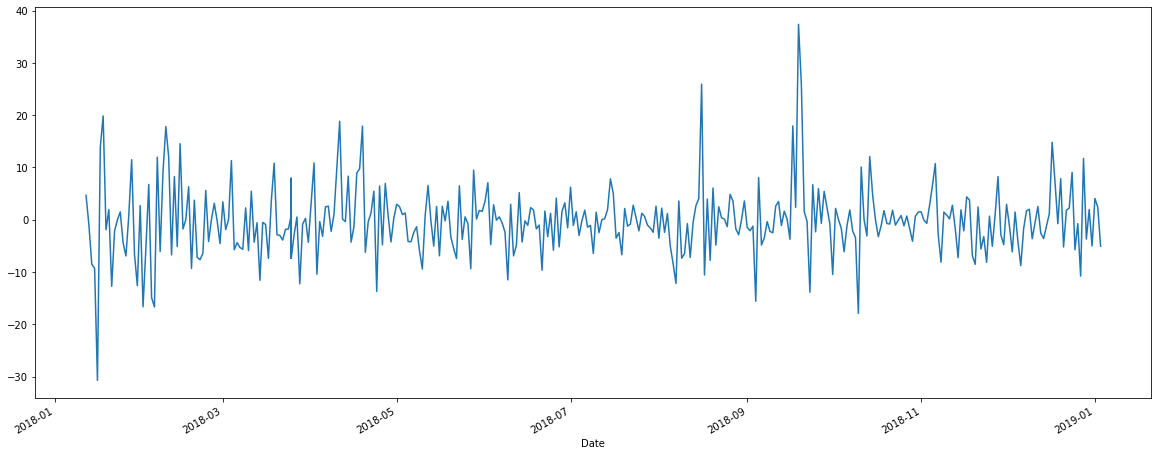

In [10]:
#stock return
df_final['ReturnXRP']=df_final['ChangeXRP'].sub(1).mul(100)
df_final['ReturnXRP'].plot(figsize=(20,8))

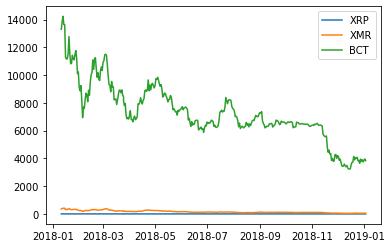

In [7]:
#Compare timeseries
pp.plot(df_final['XRP-USD'])
pp.plot(df_final['XMR-USD'])
pp.plot(df_final['BTC-USD'])
pp.legend(['XRP','XMR','BCT'])
pp.show()

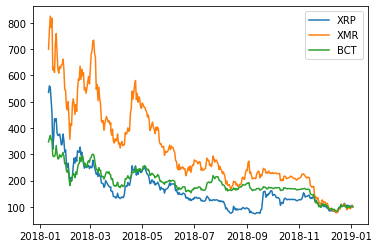

In [8]:
#Normalize - have to normalize with last value, otherwise not possible to show because gets smaller than 1!
#if growing, normalize with first value
norm_XRP=df_final['XRP-USD'].div(df_final['XRP-USD'].iloc[-1]).mul(100)
norm_XMR=df_final['XMR-USD'].div(df_final['XMR-USD'].iloc[-1]).mul(100)
norm_BTC=df_final['BTC-USD'].div(df_final['BTC-USD'].iloc[-1]).mul(100)
#plot
pp.plot(norm_XRP)
pp.plot(norm_XMR)
pp.plot(norm_BTC)
pp.legend(['XRP','XMR','BCT'])
pp.show()

<function matplotlib.pyplot.show(*args, **kw)>

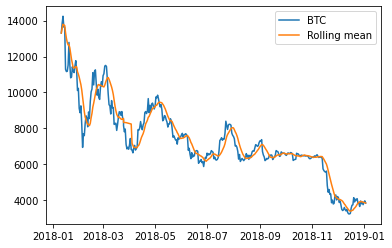

In [13]:
#plotting a rolling mean of 10 days
rolling_BTC=df_final['BTC-USD'].rolling('10D').mean()
pp.plot(df_final['BTC-USD'])
pp.plot(rolling_BTC)
pp.legend(['BTC','Rolling mean'])
pp.show

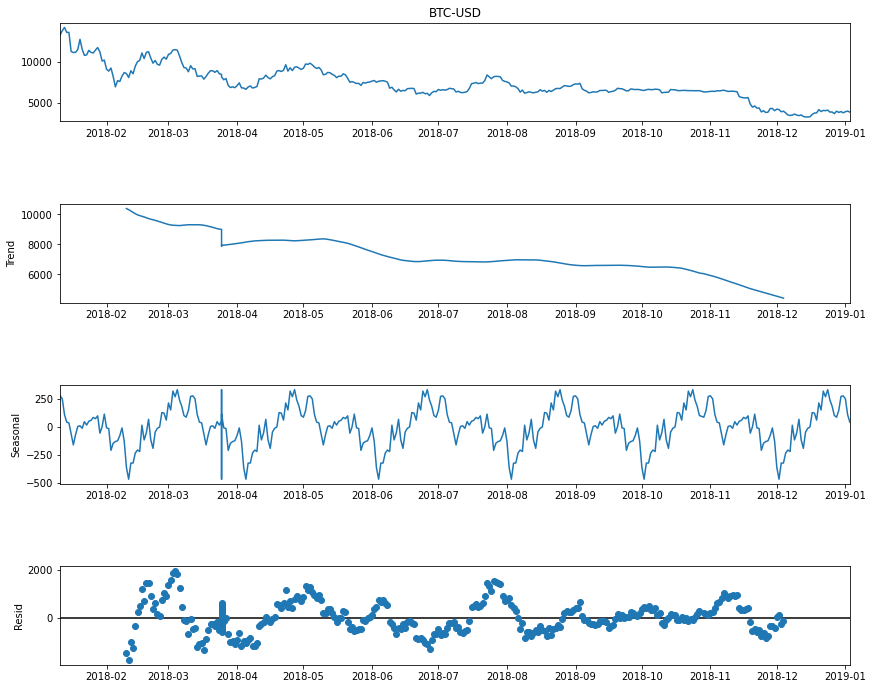

In [14]:
#decompose trend/seasonality / noise

decomp_BTC=sm.tsa.seasonal_decompose(df_final['BTC-USD'], period=60)
#pp.figure(figsize=(6.4,8))
figure=decomp_BTC.plot()
figure.set_size_inches(14,11)
pp.show()

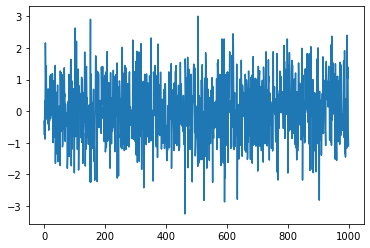

In [15]:
#White noise
#it has constant mean, constant variance, zero auto-correlation at all lags
white_noise=np.random.normal(loc=0, scale=1, size=1000)
#loc is mean and scale is variance
pp.plot(white_noise)

In [16]:
#augmented dickey-fuller test
from statsmodels.tsa.stattools import adfuller
df_final=df_final.fillna(method='bfill')
for (columnName, columnData) in df_final.iteritems():
    adf = adfuller(columnData)
    print("p-value of " + columnName+": {}".format(float(adf[1])))

p-value of BCH-USD: 0.006140158894635843
p-value of BTC-USD: 0.4453636567419643
p-value of ETH-USD: 0.11102016606786791
p-value of IOT-USD: 0.13871432779089665
p-value of LTC-USD: 0.7473496877882584
p-value of XMR-USD: 0.38938902611536885
p-value of XRP-USD: 0.012858440849299225
p-value of ChangeXRP: 1.1296571392818913e-07
p-value of ReturnXRP: 1.1296571392816776e-07


The null hypothesis of the test is that the time series can be represented by a unit root, that it is not stationary (has some time-dependent structure). The alternate hypothesis (rejecting the null hypothesis) is that the time series is stationary.

    1. Null Hypothesis (H0): If failed to be rejected, it suggests the time series has a unit root, meaning it is non-stationary. It has some time dependent structure.
    2. Alternate Hypothesis (H1): The null hypothesis is rejected; it suggests the time series does not have a unit root, meaning it is stationary. It does not have time-dependent structure.

We interpret this result using the p-value from the test. A p-value below a threshold (such as 5% or 1%) suggests we reject the null hypothesis (stationary), otherwise a p-value above the threshold suggests we fail to reject the null hypothesis (non-stationary).

    p-value > 0.05: Fail to reject the null hypothesis (H0), the data has a unit root and is non-stationary.
    p-value <= 0.05: Reject the null hypothesis (H0), the data does not have a unit root and is stationary.



                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  483
Model:                     ARMA(3, 3)   Log Likelihood                 792.472
Method:                       css-mle   S.D. of innovations              0.047
Date:                Mon, 18 May 2020   AIC                          -1568.943
Time:                        07:24:45   BIC                          -1535.503
Sample:                             0   HQIC                         -1555.802
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0032      0.002     -1.697      0.090      -0.007       0.001
ar.L1.y        0.5819      0.015     38.896      0.000       0.553       0.611
ar.L2.y        0.5833      0.013     43.311      0.0

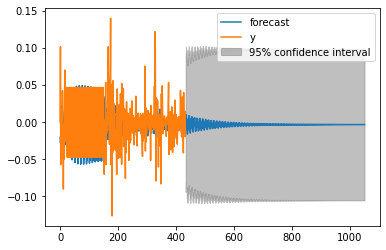

In [9]:
from statsmodels.tsa.arima_model import ARMA
model = ARMA(df_final["XRP-USD"].diff().iloc[1:].values, order=(3,3))
result=model.fit()
print(result.summary())
print("μ={} ,θ={}".format(result.params[0],result.params[1]))
result.plot_predict(start=50, end=1100)
pp.show()

In [18]:
#sets the minimum mean absolute error to the mean of the column to predict (must always be bigger
#or my model really sucks..)
min_mae=df_final['BTC-USD'].mean()
best_model='none'

In [19]:
#---------------------------MACHINE LEARNING ---------------------------------####
#Construct the variables
    #X goes from day 0 to N-1
    #Y (to predict) goes from day 1 to N
    #Select the column from the df_final as variable to predict (Y)
X=df_final.copy()
print(len(X))
#X=X.dropna(axis=0)
#print('Without nan, len of X= '+ str(len(X['BTC-USD'])))
Y=X['BTC-USD'].iloc[1:].copy()
X=X[:-1]
print('Y len = ' + str(len(Y)))
print('X len =' + str(len(X)))
Y.tail()

#Remove 15% percent of the data to test later on, but on cronological order.
number_to_cutoff=int(round(0.15*len(Y),0))
X_test_tail=X[len(X)-number_to_cutoff:]
Y_test_tail=Y[len(Y)-number_to_cutoff:]
X=X[:-number_to_cutoff]
Y=Y[:-number_to_cutoff]
X

484
Y len = 483
X len =483


,BCH-USD,BTC-USD,ETH-USD,IOT-USD,LTC-USD,XMR-USD,XRP-USD,ChangeXRP,ReturnXRP
Date,,,,,,,,,
2018-01-11,2437.919922,13308.059570,1139.319946,3.3500,226.529999,352.950012,1.9300,1.046632,4.663212
2018-01-12,2596.199951,13841.190430,1261.030029,3.6400,235.350006,389.399994,2.0200,1.046632,4.663212
2018-01-13,2664.899902,14243.120117,1385.020020,3.9000,257.940002,416.290009,2.0000,0.990099,-0.990099
2018-01-14,2530.209961,13638.629883,1359.479980,3.7200,236.860001,394.459991,1.8300,0.915000,-8.500000
2018-01-15,2394.050049,13631.980469,1278.689941,3.4700,231.889999,412.820007,1.6600,0.907104,-9.289617
...,...,...,...,...,...,...,...,...,...
2018-10-17,439.549988,6488.720215,202.490005,0.5021,52.349998,104.250000,0.4619,0.967532,-3.246753
2018-10-18,441.989990,6469.279785,202.860001,0.4947,52.810001,105.199997,0.4567,0.988742,-1.125785
2018-10-19,449.570007,6490.560059,205.080002,0.5046,53.310001,105.620003,0.4646,1.017298,1.729801


In [20]:
#Split the data (train and verification)
from sklearn.model_selection import train_test_split

# split data into training and validation data, for both features and target
# The split is based on a random number generator. Supplying a numeric value to
# the random_state argument guarantees we get the same split every time we
# run this script.

#maybe it makes NO SENSE TO RANDOMISE TRAIN AND VAL SINCE WE WANT TO PREDICT FUTURE MOMENTS
#train_X, val_X, train_Y, val_Y = train_test_split(X, Y, random_state = 0)
number_to_cutoff=int(round(0.20*len(Y),0))
train_X=X[:-number_to_cutoff]
train_Y=Y[:-number_to_cutoff]
val_X=X[len(X)-number_to_cutoff:]
val_Y=Y[len(Y)-number_to_cutoff:]

In [21]:
#Build the model
#-----> ML Model : Tree
from sklearn.tree import DecisionTreeRegressor
# Fit the model. Specify a number for random_state to ensure same results each run 
# and look what number of leaf gives best mae
def get_mae_tree(max_leaf_nodes, train_X, val_X, train_Y, val_Y):
    model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=0)
    model.fit(train_X, train_Y)
    preds_val= model.predict(val_X)
    mae=mean_absolute_error(val_Y, preds_val)
    return(mae)

# Fit model (see to not underfit or overfit the model)
print("--------DecisionTreeRegressor--------")
for max_leaf_nodes in [5, 50, 500, 5000, 10000]:
    my_mae = get_mae_tree(max_leaf_nodes, train_X, val_X, train_Y, val_Y)
    print("Max leaf nodes: %d  \t\t Mean Absolute Error:  %d" %(max_leaf_nodes, my_mae))
    if min_mae > my_mae:
        min_mae=my_mae
        best_model='DecisionTreeRegressor with max_leaf_nodes: ' + str(max_leaf_nodes) +" and mae: "+ str(my_mae)

--------DecisionTreeRegressor--------
Max leaf nodes: 5  		 Mean Absolute Error:  345
Max leaf nodes: 50  		 Mean Absolute Error:  320
Max leaf nodes: 500  		 Mean Absolute Error:  326
Max leaf nodes: 5000  		 Mean Absolute Error:  326
Max leaf nodes: 10000  		 Mean Absolute Error:  326


In [22]:
#-----> ML Model : Random Forest
from sklearn.ensemble import RandomForestRegressor

def get_mae_forest(max_leaf_nodes, train_X, val_X, train_Y, val_Y, n_estimators=50):
    model = RandomForestRegressor(n_estimators=n_estimators, max_leaf_nodes=max_leaf_nodes, random_state=0)
    model.fit(train_X, train_Y)
    preds_val= model.predict(val_X)
    mae=mean_absolute_error(val_Y, preds_val)
    return(mae)

# Fit model (see to not underfit or overfit the model)
print("--------ForestRegressor--------")
for max_leaf_nodes in [5, 50, 500, 5000, 10000]:
    for trees in [5,20,50,80]:
        my_mae = get_mae_forest(max_leaf_nodes, train_X, val_X, train_Y, val_Y, trees)
        print("Max leaf nodes: %d \t trees: %d  \t\t Mean Absolute Error:  %d" %(max_leaf_nodes, trees, my_mae))
        if min_mae > my_mae:
            min_mae=my_mae
            best_model='RandomForest with max_leaf_nodes: ' + str(max_leaf_nodes)+ ", number of trees: (estimators) "+ str(trees) +" and mae: "+ str(my_mae)

--------ForestRegressor--------
Max leaf nodes: 5 	 trees: 5  		 Mean Absolute Error:  240
Max leaf nodes: 5 	 trees: 20  		 Mean Absolute Error:  317
Max leaf nodes: 5 	 trees: 50  		 Mean Absolute Error:  326
Max leaf nodes: 5 	 trees: 80  		 Mean Absolute Error:  328
Max leaf nodes: 50 	 trees: 5  		 Mean Absolute Error:  158
Max leaf nodes: 50 	 trees: 20  		 Mean Absolute Error:  145
Max leaf nodes: 50 	 trees: 50  		 Mean Absolute Error:  148
Max leaf nodes: 50 	 trees: 80  		 Mean Absolute Error:  143
Max leaf nodes: 500 	 trees: 5  		 Mean Absolute Error:  166
Max leaf nodes: 500 	 trees: 20  		 Mean Absolute Error:  152
Max leaf nodes: 500 	 trees: 50  		 Mean Absolute Error:  155
Max leaf nodes: 500 	 trees: 80  		 Mean Absolute Error:  150
Max leaf nodes: 5000 	 trees: 5  		 Mean Absolute Error:  166
Max leaf nodes: 5000 	 trees: 20  		 Mean Absolute Error:  152
Max leaf nodes: 5000 	 trees: 50  		 Mean Absolute Error:  155
Max leaf nodes: 5000 	 trees: 80  		 Mean Absolute 

In [23]:
best_model

'RandomForest with max_leaf_nodes: 50, number of trees: (estimators) 80 and mae: 143.99496104827332'

In [27]:
#Run the best model:
model = RandomForestRegressor(n_estimators=80, max_leaf_nodes=50, random_state=0)
model.fit(train_X, train_Y)
preds_val= model.predict(X_test_tail)

In [28]:
#make a verification if the prediction of the modification of the value going up or down is right
#meaning -> we take the normal data (val_Y), look if (N-1)-N is positive or negative
#-> do the same with predicted data (preds_val), and compare!


#MAKES NO SENSE SINCE THE DATA VAL_Y IS NOT CONTINUOUS IN TIME!
#use full data? 
def change(x,y):
    return (y-x)/x

report_y=[]
report_pred=[]
for i, value in enumerate(Y_test_tail):
    if i+1 < len(Y_test_tail):
        report_y.append(change(value, Y_test_tail[i+1]))
        report_pred.append(change(preds_val[i],preds_val[i+1]))


In [29]:
#verify if the increase/decrease was well predicted 

plotdata=[]
corrects=0
for i, value in enumerate(report_y):
    if report_y[i]>0 and report_pred[i]>0:
        corrects=corrects+1
        plotdata.append(+1)
    elif report_y[i]<0 and report_pred[i]<0:
        corrects=corrects+1
        plotdata.append(+1)
    else:
        plotdata.append(-1)
        
print('The percentage of increase/decrease well predicted is: ' + str(corrects/len(report_y)))

for i, value in enumerate(preds_val):
    print(
            "Val: " + str(round(Y_test_tail[i],2)) + 
            " \t \t \t ; \t Pred: " + str(round(preds_val[i],2)) 
         )
    if i<len(report_pred):
        print(
            "Has increase of: " + str(round(report_y[i],2)) +
            "\t\t ; \t Predicted future increase of: " + str(round(report_pred[i],3))
        )

The percentage of increase/decrease well predicted is: 0.29577464788732394
Val: 6476.25 	 	 	 ; 	 Pred: 6406.27
Has increase of: -0.0		 ; 	 Predicted future increase of: -0.003
Val: 6462.77 	 	 	 ; 	 Pred: 6384.69
Has increase of: -0.0		 ; 	 Predicted future increase of: 0.001
Val: 6457.21 	 	 	 ; 	 Pred: 6390.69
Has increase of: 0.0		 ; 	 Predicted future increase of: 0.0
Val: 6470.17 	 	 	 ; 	 Pred: 6390.69
Has increase of: 0.0		 ; 	 Predicted future increase of: 0.002
Val: 6470.74 	 	 	 ; 	 Pred: 6402.37
Has increase of: -0.02		 ; 	 Predicted future increase of: -0.002
Val: 6313.91 	 	 	 ; 	 Pred: 6390.69
Has increase of: -0.0		 ; 	 Predicted future increase of: 0.007
Val: 6309.11 	 	 	 ; 	 Pred: 6435.06
Has increase of: 0.01		 ; 	 Predicted future increase of: -0.003
Val: 6342.61 	 	 	 ; 	 Pred: 6417.08
Has increase of: 0.01		 ; 	 Predicted future increase of: -0.002
Val: 6381.3 	 	 	 ; 	 Pred: 6406.37
Has increase of: 0.0		 ; 	 Predicted future increase of: -0.003
Val: 6394.66 	 	

In [30]:
#try to make a loop where you train the model for X data, predict X+1, train the model for X+1 data, predict X+2 and so on
#idea!
#or the 3 next days, and after one day passes it retrains and predict the next 3 days...
X=df_final.copy()
X=X.dropna(axis=0)
Y=X['BTC-USD'].iloc[1:].copy()
X=X[:-1]

#Remove 15% percent of the data.
number_to_cutoff=int(round(0.15*len(Y),0))
X_test_tail=X[len(X)-number_to_cutoff:]
Y_test_tail=Y[len(Y)-number_to_cutoff:]
X=X[:-number_to_cutoff]
Y=Y[:-number_to_cutoff]


#For each loop -> add one day to training data and predict the 3 next days. Save it in an overall variable to make 
#precision calculations
correct_inc=0
total_preds=0
model = RandomForestRegressor(n_estimators=80, max_leaf_nodes=50, random_state=0)
nbr_days_to_predict=1 #for 1 day, it has more than 50%!

for i in range(0, number_to_cutoff-3):
    model.fit(X[:-number_to_cutoff+i], Y[:-number_to_cutoff+i])
    start_pred=len(X)-number_to_cutoff+i
    preds_val= model.predict(X[start_pred:start_pred+nbr_days_to_predict])
        
    #print("The mean absolute error is: " + str(mean_absolute_error(preds_val, Y[start_pred:start_pred+3])))
    for j, pred in enumerate(preds_val):
        #calculate the increase/decrease of the BTC value between day N and N+1 (actual and predicted)
        act_inc=round(change(Y[start_pred-1+j], Y[start_pred+j]),3)
        if j==0:
                pred_inc=round(change(Y[start_pred-1+j], pred),3) 
        else:
                pred_inc=round(change(preds_val[j-1], preds_val[j]),3) 
        
        total_preds=total_preds+1
        if act_inc > 0 and pred_inc >0:
            correct_inc=correct_inc+1
        elif act_inc < 0 and pred_inc <0:
            correct_inc=correct_inc+1
            
print("The percentage of direction of value change predicted correctly is: " + str(round(correct_inc/total_preds,2)) )
        

The percentage of direction of value change predicted correctly is: 0.62


In [31]:
val_Y[:3]

Date
2018-08-02    7417.600098
2018-08-03    7017.890137
2018-08-04    7042.390137
Name: BTC-USD, dtype: float64

In [8]:
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
    series = tf.expand_dims(series, axis=-1)
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size + 1, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size + 1))
    ds = ds.shuffle(shuffle_buffer)
    ds = ds.map(lambda w: (w[:-1], w[1:]))
    return ds.batch(batch_size).prefetch(1)

In [9]:
def model_forecast(model, series, window_size):
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size))
    ds = ds.batch(32).prefetch(1)
    forecast = model.predict(ds)
    return forecast

In [10]:
from tensorflow import keras
from tensorflow.keras import layers

In [11]:
df_final.shape

(484, 7)

In [13]:
shuffl_buffer_size=500
batch_size=100
window_size=14
dataset = df_final[:-1].copy()
#dataset= dataset.rolling(14) does not the desired outcome, do it manually
#print(type(dataset))
Y= df_final['BTC-USD'][1:].copy()

number_to_cutoff=int(round(0.20*len(Y),0))
train_X=dataset[:-number_to_cutoff]
train_Y=Y[:-number_to_cutoff]
val_X=dataset[len(dataset)-number_to_cutoff:]
val_Y=Y[len(Y)-number_to_cutoff:]

In [24]:
tf.keras.backend.set_floatx('float32')
model=keras.Sequential(
    [
        layers.Dense(7, activation="relu"),
        layers.Dense(2, activation="relu"),
        layers.Dense(1),
    ])
optimizer = tf.keras.optimizers.SGD(lr=1e-5, momentum=0.9)
lr_schedule = tf.keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-8 * 10**(epoch / 20))
model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])
model.fit(train_X,train_Y, epochs=100, callbacks=[lr_schedule])
preds_val= model.predict(val_X)
mae=mean_absolute_error(val_Y, preds_val)
history = model.fit(train_X, epochs=100, callbacks=[lr_schedule])
#x=tf.ones((2,4))
#x=tf.reshape(df_final, [484,7]) #to transform our data into a tensor!
#y=model(x)
#print("Number of weights after calling the model:", len(model.weights)) 
#print(x)

Epoch 1/100

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

13/13 [==============================] - 0s 690us/step - loss: 10719.1816 - mae: 10719.6816 - lr: 1.0000e-08
Epoch 2/100
13/13 [==============================] - 0s 613us/step - loss: 10648.3389 - mae: 10648.8389 - lr: 1.1220e-08
Epoch 3/100
13/13 [==============================] - 0s 613us/step - loss: 10547.6035 - mae: 10548.1035 - lr: 1.2589e-08
Epoch 4/100
13/13 [==============================] - 0s 690us/step - loss: 10430.8994 - mae: 10431.3994 - lr: 1.4125e-08
Epoch 5/100
13/13 [=====

Epoch 64/100
13/13 [==============================] - 0s 537us/step - loss: 1544.9802 - mae: 1545.4802 - lr: 1.4125e-05
Epoch 65/100
13/13 [==============================] - 0s 614us/step - loss: 2328.6099 - mae: 2329.1089 - lr: 1.5849e-05
Epoch 66/100
13/13 [==============================] - 0s 537us/step - loss: 7828.9243 - mae: 7829.4243 - lr: 1.7783e-05
Epoch 67/100
13/13 [==============================] - 0s 537us/step - loss: 8144.9082 - mae: 8145.4082 - lr: 1.9953e-05
Epoch 68/100
13/13 [==============================] - 0s 614us/step - loss: 8144.9048 - mae: 8145.4048 - lr: 2.2387e-05
Epoch 69/100
13/13 [==============================] - 0s 537us/step - loss: 8144.9014 - mae: 8145.4014 - lr: 2.5119e-05
Epoch 70/100
13/13 [==============================] - 0s 614us/step - loss: 8144.8984 - mae: 8145.3984 - lr: 2.8184e-05
Epoch 71/100
13/13 [==============================] - 0s 537us/step - loss: 8144.8945 - mae: 8145.3945 - lr: 3.1623e-05
Epoch 72/100
13/13 [====================

ValueError: in user code:

    C:\Users\Yves\GOOGLE~1\PROGRA~1\venv_py3\lib\site-packages\tensorflow\python\keras\engine\training.py:571 train_function  *
        outputs = self.distribute_strategy.run(
    C:\Users\Yves\GOOGLE~1\PROGRA~1\venv_py3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:951 run  **
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\Yves\GOOGLE~1\PROGRA~1\venv_py3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2290 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\Yves\GOOGLE~1\PROGRA~1\venv_py3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2649 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\Yves\GOOGLE~1\PROGRA~1\venv_py3\lib\site-packages\tensorflow\python\keras\engine\training.py:541 train_step  **
        self.trainable_variables)
    C:\Users\Yves\GOOGLE~1\PROGRA~1\venv_py3\lib\site-packages\tensorflow\python\keras\engine\training.py:1804 _minimize
        trainable_variables))
    C:\Users\Yves\GOOGLE~1\PROGRA~1\venv_py3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:521 _aggregate_gradients
        filtered_grads_and_vars = _filter_grads(grads_and_vars)
    C:\Users\Yves\GOOGLE~1\PROGRA~1\venv_py3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:1219 _filter_grads
        ([v.name for _, v in grads_and_vars],))

    ValueError: No gradients provided for any variable: ['sequential_7/dense_21/kernel:0', 'sequential_7/dense_21/bias:0', 'sequential_7/dense_22/kernel:0', 'sequential_7/dense_22/bias:0', 'sequential_7/dense_23/kernel:0', 'sequential_7/dense_23/bias:0'].


In [23]:
pp.semilogx(history.history["lr"], history.history["loss"])

NameError: name 'history' is not defined

In [81]:
model.summary()

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_46 (Dense)             multiple                  70        
_________________________________________________________________
dense_47 (Dense)             multiple                  16        
_________________________________________________________________
dense_48 (Dense)             multiple                  12        
Total params: 98
Trainable params: 98
Non-trainable params: 0
_________________________________________________________________


In [106]:
model=keras.Sequential()
model.add(keras.Input(shape=(len(df_final),9)))
model.add(layers.Conv1D(32,14, activation="relu"))
model.add(layers.LSTM(64, return_sequences=True))
model.add(layers.Dense(30,activation="relu"))
model.add(layers.Dense(9))

In [108]:
model.summary()

Model: "sequential_39"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_7 (Conv1D)            (None, 471, 32)           4064      
_________________________________________________________________
lstm_6 (LSTM)                (None, 471, 64)           24832     
_________________________________________________________________
dense_53 (Dense)             (None, 471, 30)           1950      
_________________________________________________________________
dense_54 (Dense)             (None, 471, 9)            279       
Total params: 31,125
Trainable params: 31,125
Non-trainable params: 0
_________________________________________________________________


In [ ]:
lr_schedule = tf.keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-8 * 10**(epoch / 20))
optimizer = tf.keras.optimizers.SGD(lr=1e-8, momentum=0.9)
model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])
history = model.fit(train_set, epochs=100, callbacks=[lr_schedule])